In [5]:
import pandas as pd
import matplotlib
import dataframe_image as dfi
%matplotlib notebook

In [11]:
def save_plots(sheet_name):
    df = pd.read_excel("data/lap_times.xlsx", engine="openpyxl", sheet_name=sheet_name)
#     df.columns = pd.to_datetime(df.columns, errors='coerce').date
    df = df.dropna(axis=1, how='all')
    fig = df.plot.box(title=f"Stats of lap times. {sheet_name}.").get_figure()
    fig.savefig(f'images/results_{sheet_name.replace(" ", "_")}.png')
    xtick_labels = fig.get_axes()[0].get_xticklabels()
    xtick_labels = [a.get_text().replace(" ", "\n") for a in xtick_labels]
    fig.get_axes()[0].set_xticklabels(xtick_labels)
    fig.show()

    stats = pd.concat([df.median(), df.min()], axis=1)
    stats.columns = ["Median", "Best lap"]
    stats = stats.style.format(precision=2, decimal=",")
    dfi.export(stats, f'images/stats_{sheet_name.replace(" ", "_")} .png')

<IPython.core.display.Javascript object>


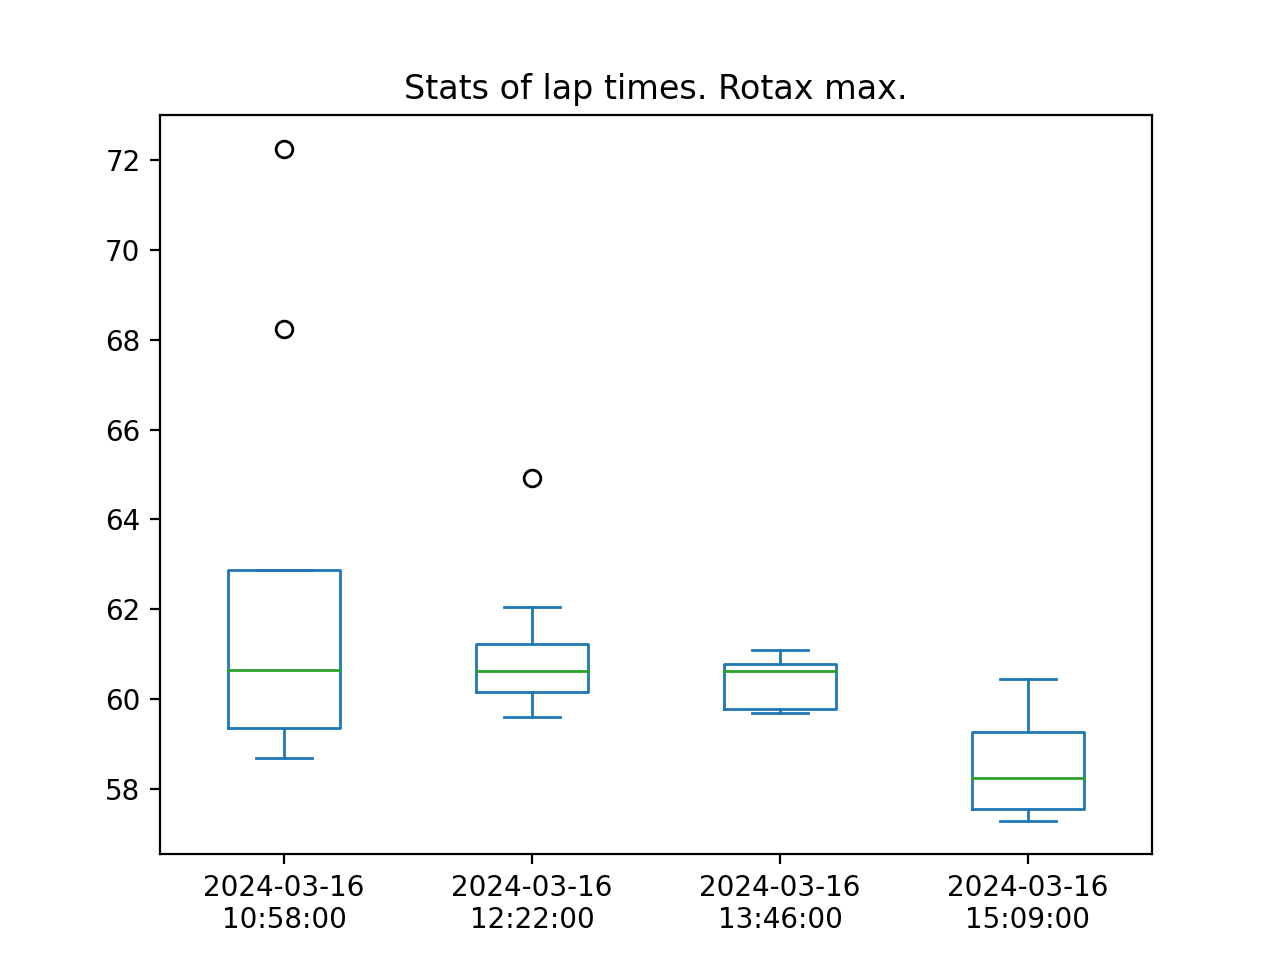

<IPython.core.display.Javascript object>


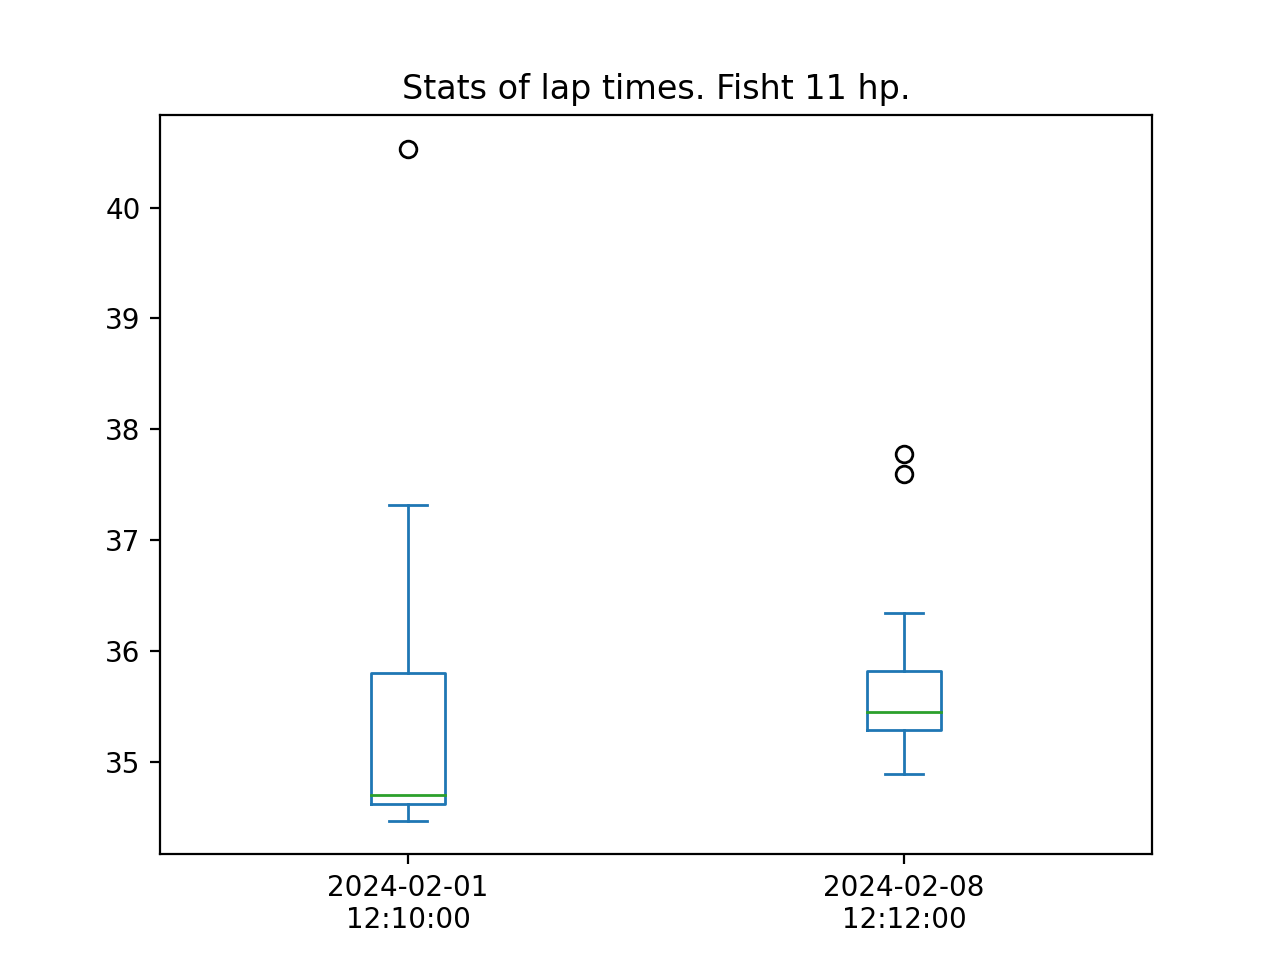

In [12]:
save_plots("Rotax max")
save_plots("Fisht 11 hp")